
# Primeira atividade de avaliação
Instruções: em dupla - entrega dia 07/04 - enviar para: tatitavares8@gmail.com

Utilizando a toolbox de sua preferência, realize o treinamento de uma rede neural artificial
do tipo Perceptron Multicamadas para resolver um problema de classificação multiclasses.
Além do conjunto de treinamento, considere um conjunto de validação para
avaliação final do método. Descreva as características dos dados, descreva a arquitetura da rede (dimensão, número de camadas) e discuta aspectos de desempenho (forma de divisão dos dados para treinamento, validação e
teste, porcentagem de classificação correta, matriz de confusão). Sugestão: Escolher
conjuntos de dados dentre os disponíveis no UC Irvine Machine Learning Repository :
http://archive.ics.uci.edu/ml/.

In [1]:
import os

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'poker-hand-testing.csv',
 'poker-hand-training-true.csv',
 'poker-hand.names',
 'trabalho_final.ipynb',
 'winequality-red.csv']

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### Foi escolhido o dataset 'Red Wine Quality' disponível em:
##### https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009
##### A escolha desse dataset foi devido à sua simplicidade e sua conformidade com o problema proposto (ser um problema de classificação multiclasse).

In [4]:
df_wine = pd.read_csv('winequality-red.csv')

In [5]:
df_wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [6]:
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
df_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


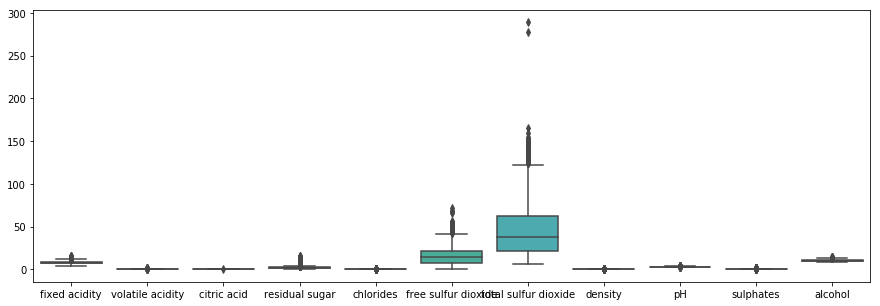

In [8]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df_wine.iloc[:,0:11])

##### Percebe-se que as escalas dos dados variam bastante entre algumas features. Decidiu-se normalizar os dados em função disso.

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_wine_scaled = pd.DataFrame(scaler.fit_transform(df_wine.values[:,0:11]),
                              columns=df_wine.columns[0:11])

In [10]:
df_wine_scaled['quality']= df_wine.quality

In [11]:
df_wine_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,5
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,5
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,5
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,5


In [12]:
df_wine_scaled.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.329171,0.279329,0.270976,0.112247,0.125988,0.209506,0.142996,0.490211,0.449695,0.196496,0.311228,5.636023
std,0.154079,0.122644,0.194801,0.096570,0.078573,0.147326,0.116238,0.138571,0.121564,0.101501,0.163949,0.807569
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,0.221239,0.184932,0.090000,0.068493,0.096828,0.084507,0.056537,0.406021,0.370079,0.131737,0.169231,5.000000
50%,0.292035,0.273973,0.260000,0.089041,0.111853,0.183099,0.113074,0.490455,0.448819,0.173653,0.276923,6.000000
75%,0.407080,0.356164,0.420000,0.116438,0.130217,0.281690,0.197880,0.570117,0.519685,0.239521,0.415385,6.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000


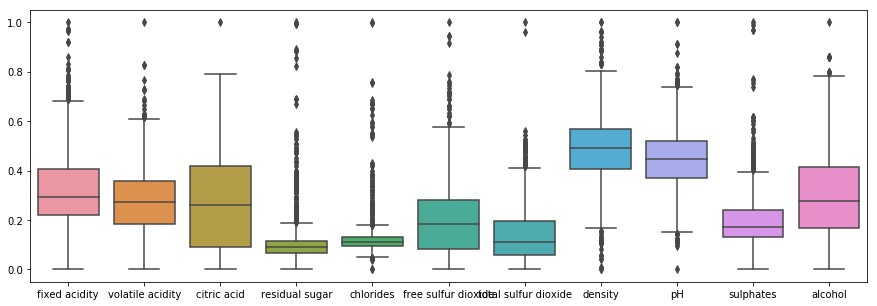

In [13]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df_wine_scaled.iloc[:,0:11])

##### Agora é mais fácil ver a distribuição de cada feature

In [14]:
from sklearn.model_selection import train_test_split

##### É importante observar que a distribuição das classes é bastante desbalanceada, além de só existerem classificações de 3 a 8.

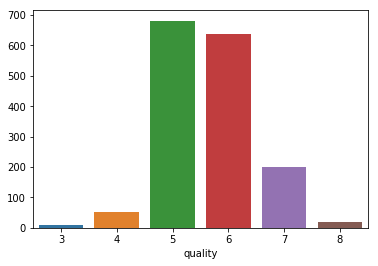

In [15]:
s_dist=df_wine_scaled.iloc[:,11].groupby(df_wine_scaled.iloc[:,11]).count()
sns.barplot(s_dist.index, s_dist.values)

##### Os dados devem ser separados em dados de treino e de teste. Separou-se 30% para o teste de forma estratificada.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df_wine_scaled.iloc[:,0:11],
                                        df_wine_scaled.iloc[:,11],
                                        test_size=0.3,
                                        random_state=42, stratify= df_wine_scaled.iloc[:,11]
                                                   )

##### Após separar os dados de treino e de teste, é hora de importar o modelo a ser usado

In [17]:
from sklearn.neural_network import MLPClassifier

##### Optou-se por utilizar, inicialmente, uma rede neural do tipo Perceptron Multicamadas com seus hiperparâmetros padrão (3 camadas, com 100 neurônios na camada oculta)
##### https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier

In [18]:
clf = MLPClassifier(random_state=42)
clf.fit(X_train, y_train)

C:\Users\Maas\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=42, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [19]:
pred=clf.predict(X_test)

##### É hora de ver o desempenho do classificador

In [20]:
from sklearn.metrics import classification_report

In [21]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        16
           5       0.66      0.75      0.70       204
           6       0.55      0.64      0.59       192
           7       0.65      0.28      0.40        60
           8       0.00      0.00      0.00         5

   micro avg       0.61      0.61      0.61       480
   macro avg       0.31      0.28      0.28       480
weighted avg       0.58      0.61      0.58       480



C:\Users\Maas\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Maas\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Maas\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


##### Podemos destacar a precisão para a classe 7 (0.65), embora sua sensibilidade tenha sido apenas de 0.28.
##### A sensibilidade da classe 5 (a mais frequente) foi de 0.75, um bom número, o f1-score dessa classe atigiu 0.7.
##### O classificador não pontuou nas classes 3,4 e 8.

##### A partir desse resultado, tenta-se melhorar o modelo usando GridSearch. Foram escolhidos os parâmetros: solver, activation e learning_rate para encontrar o melhor conjunto.
##### Adotou-se a métrica: f1_macro

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
tuned_parameters = [
    {
        'solver':['lbfgs', 'sgd', 'adam'],
        'activation':['logistic', 'tanh', 'relu'],
        'learning_rate':['constant', 'invscaling', 'adaptive']
    }]

In [24]:
tuned_clf = GridSearchCV(
        MLPClassifier(random_state=42), tuned_parameters, 'f1_macro'
    )
tuned_clf.fit(X_train, y_train)

C:\Users\Maas\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Maas\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Maas\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Maas\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Maas\Anaconda

C:\Users\Maas\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Maas\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Maas\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Maas\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Maas\Anaconda3\lib\

C:\Users\Maas\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Maas\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Maas\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Maas\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Maas\Anaconda3\lib\

C:\Users\Maas\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Maas\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Maas\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Maas\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Maas\Anaconda3\lib\

C:\Users\Maas\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Maas\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Maas\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Maas\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Maas\Anaconda3\lib\site-packages\sklearn\metrics\classi

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=42, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'solver': ['lbfgs', 'sgd', 'adam'], 'activation': ['logistic', 'tanh', 'relu'], 'learning_rate': ['constant', 'invscaling', 'adaptive']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_macro', verbose=0)

In [25]:
print("Melhor conjunto de hiperparâmetros:")
print(tuned_clf.best_params_)

Melhor conjunto de hiperparâmetros:
{'activation': 'tanh', 'learning_rate': 'constant', 'solver': 'lbfgs'}


##### Os parâmetros escolhidos pelo GridSearch foram: 
##### 'activation': 'tanh', 'learning_rate': 'constant' e 'solver': 'lbfgs'

In [26]:
tuned_pred = tuned_clf.predict(X_test)

In [27]:
print(classification_report(y_test, tuned_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        16
           5       0.67      0.73      0.70       204
           6       0.55      0.62      0.58       192
           7       0.47      0.28      0.35        60
           8       0.00      0.00      0.00         5

   micro avg       0.59      0.59      0.59       480
   macro avg       0.28      0.27      0.27       480
weighted avg       0.57      0.59      0.58       480



C:\Users\Maas\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Maas\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Maas\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


##### Apesar do esforço, não houve melhora na classificação.
##### O desbalanceamento das classes atrapalha bastante a busca de um bom modelo. 
##### Talvez, fosse o caso de tentar mudar outros hiperparâmetros ou fazer uma seleção de features.

# Segunda atividade de avaliação

Implemente um rede neural artificial do tipo Perceptron com uma camada oculta para solução do problema XOR.
Obs: utilizar apenas as tooboxs matemáticas, como numpy para o python.

##### Para começar é necessário criar o dataset que representa as possibilidades de um 'xor'

In [28]:
xor_data = pd.DataFrame({'x1':[0,0,1,1],'x0':[0,1,0,1], 'y':[0,1,1,0]})
xor_data

,x1,x0,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


##### A seguir define-se a função de ativação, conhecida como logistic sigmoid

In [29]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

##### É importante  poder calcular a derivada dessa função que é: $f(x)(1-f(x))$

In [30]:
def sigmoid_derivada(x):
    return (1 / (1 + math.exp(-x)))*(1 - (1 / (1 + math.exp(-x))))

##### A arquitetura da rede terá 3 camadas: entrada, oculta e saída. A camada oculta terá 4 neurônios com inicialização dos pesos aleatória

In [31]:
# camada oculta
w0_camada_oculta = np.random.random((4,1))
print(f'w0 camada oculta:\n{w0_camada_oculta}')
w1_camada_oculta = np.random.random((4,1))
print(f'w1 camada oculta:\n{w1_camada_oculta}')
soma_camada_oculta = np.zeros((4,1))
print(f'soma camada oculta:\n{soma_camada_oculta}')
ativacao_co = np.zeros((4,1))
print(f'ativação camada oculta:\n{ativacao_co}')
# camada de saída
w0_camada_saida = np.ones((4,1))#np.random.random((4,1))
print(f'w0 camada saida:\n{w0_camada_saida}')
soma_camada_saida = np.zeros(1)
print(f'soma camada saida:\n{soma_camada_saida}')
ativacao_camada_saida = np.zeros(1)
print(f'ativacao camada saida:\n{ativacao_camada_saida}')


w0 camada oculta:
[[0.9786047 ]
 [0.64495875]
 [0.49250976]
 [0.92184928]]
w1 camada oculta:
[[0.2652284 ]
 [0.9235023 ]
 [0.17509351]
 [0.64202348]]
soma camada oculta:
[[0.]
 [0.]
 [0.]
 [0.]]
ativação camada oculta:
[[0.]
 [0.]
 [0.]
 [0.]]
w0 camada saida:
[[1.]
 [1.]
 [1.]
 [1.]]
soma camada saida:
[0.]
ativacao camada saida:
[0.]


In [32]:
x0 = xor_data['x0'].values
x1 = xor_data['x1'].values
y = xor_data['y'].values

##### Aqui são definidas algumas funções auxiliares para trabalhar com as matrizes que representam os cálculos na rede

In [33]:
def sigmoid_mat(mat):
    m = []
    if len(mat.shape) ==1:
        for r in mat:
                m.append(sigmoid(r))
        return np.array(m).reshape(4,1)
    else:
        for r in mat:
            for c in r:
                m.append(sigmoid(c))
        return np.array(m).reshape(4,4)
            

In [34]:
def derivada_sigmoid_mat(mat):
    m = []
    if len(mat.shape) ==1:
        for r in mat:
                m.append(sigmoid_derivada(r))
        return np.array(m).reshape(4,1)
    else:
        for r in mat:
            for c in r:
                m.append(sigmoid_derivada(c))
        return np.array(m).reshape(4,4)
            

## Testes

##### As entradas serão representadas por dois vetores: x0 e x1, que representam as quatro entradas possíveis

In [35]:
x0

array([0, 1, 0, 1], dtype=int64)

In [36]:
x1

array([0, 0, 1, 1], dtype=int64)

##### A matriz 'z_oculta' representa todas as multiplicações das entradas pelos seus respectivos pesos na camada oculta (cada coluna é o resultado de uma entrada).

In [37]:
def calc_z_oculta(x0,x1,w0_camada_oculta,w1_camada_oculta):
    z0=x0*w0_camada_oculta
    z1=x1*w1_camada_oculta
    z_oculta=z0+z1
    return z_oculta

In [40]:
z_oculta = calc_z_oculta(x0,x1,w0_camada_oculta,w1_camada_oculta)
z_oculta

array([[0.        , 0.9786047 , 0.2652284 , 1.2438331 ],
       [0.        , 0.64495875, 0.9235023 , 1.56846105],
       [0.        , 0.49250976, 0.17509351, 0.66760327],
       [0.        , 0.92184928, 0.64202348, 1.56387276]])

##### A matriz 'y_oculta' representa o resultado da ativação de todos os 'z' calculados, ou seja, a ativação de cada neurônio da camada oculta, para todas as entradas (cada coluna é o resultado de uma entrada).

In [41]:
y_oculta=sigmoid_mat(z_oculta)
y_oculta

array([[0.5       , 0.72683127, 0.56592111, 0.77623052],
       [0.5       , 0.65587353, 0.71575519, 0.82756411],
       [0.5       , 0.62069749, 0.54366189, 0.66096628],
       [0.5       , 0.71541876, 0.65521073, 0.82690837]])

##### O vetor 'z_saida' representa a multiplicação da ativação dos 4 neurônios da camada oculta pelos respectivos pesos da camada de saída

In [42]:
def calc_z_saida(y_oculta, w0_camada_saida):
    z_parc_saida=y_oculta*w0_camada_saida
    z_saida = z_parc_saida.sum(axis=0)
    return z_saida

In [47]:
z_saida=calc_z_saida(y_oculta, w0_camada_saida)
z_saida

array([2.        , 2.71882105, 2.48054891, 3.09166927])

##### O vetor 'y_saida' representa a ativação das saídas para cada uma das 4 entradas

In [48]:
y_saida=sigmoid_mat(z_saida)
y_saida

array([[0.88079708],
       [0.93812814],
       [0.92276693],
       [0.9565478 ]])

##### O 'y' é o vetor que representa as saídas esperadas para as 4 entradas e 'erro' e o vetor que representa o erro de cada um dos 4 resultados

In [49]:
y

array([0, 1, 1, 0], dtype=int64)

In [50]:
erro = y - y_saida.reshape(4)
erro

array([-0.88079708,  0.06187186,  0.07723307, -0.9565478 ])

##### O vetor 'derivada_y_z_saida' representa a derivada da ativação da saída para cada 'z' da camada de saída. Esse valor é usado para calcular o delta de saída

In [51]:
derivada_y_z_saida = derivada_sigmoid_mat(z_saida)
derivada_y_z_saida

array([[0.10499359],
       [0.05804373],
       [0.07126813],
       [0.04156411]])

##### Vetor com os deltas de saída para cada uma das 4 entradas

In [52]:
delta_saida = erro.reshape(4) * derivada_y_z_saida.reshape(4)
delta_saida

array([-0.09247804,  0.00359127,  0.00550426, -0.03975805])

##### A matriz 'derivada_y_oculta' representa a derivada da função de ativação dos neurônios da camada oculta com relação ao "z" da camada oculta para cada neurônio. Cada coluna representa uma entrada das 4 possíveis

In [53]:
derivada_y_oculta = derivada_sigmoid_mat(z_oculta)
derivada_y_oculta

array([[0.25      , 0.19854757, 0.24565441, 0.1736967 ],
       [0.25      , 0.22570344, 0.2034497 , 0.14270175],
       [0.25      , 0.23543212, 0.24809364, 0.22408986],
       [0.25      , 0.20359476, 0.22590963, 0.14313092]])

##### A seguir, é calculado o delta da camada oculta, que e função: do delta da camada de saída; dos pesos da camada de saída; e da derivada da ativação dos neurônios da camada oculta

In [54]:
delta_oculta=derivada_y_oculta*w0_camada_saida*delta_saida
delta_oculta

array([[-0.02311951,  0.00071304,  0.00135214, -0.00690584],
       [-0.02311951,  0.00081056,  0.00111984, -0.00567354],
       [-0.02311951,  0.0008455 ,  0.00136557, -0.00890938],
       [-0.02311951,  0.00073116,  0.00124346, -0.00569061]])

##### O valor de ajuste dos pesos da camada de saída (ajuste_pesos_saida) é obtido pela soma das multiplicações das ativações de um mesmo neurônio da camada oculta, em todas as 4 entradas possíveis, pelo delta de saída de cada uma das 4 entradas.

In [55]:
y_oculta.T

array([[0.5       , 0.5       , 0.5       , 0.5       ],
       [0.72683127, 0.65587353, 0.62069749, 0.71541876],
       [0.56592111, 0.71575519, 0.54366189, 0.65521073],
       [0.77623052, 0.82756411, 0.66096628, 0.82690837]])

In [56]:
delta_saida

array([-0.09247804,  0.00359127,  0.00550426, -0.03975805])

In [57]:
ajuste_pesos_saida = (y_oculta.T * delta_saida).sum(axis=0)
ajuste_pesos_saida

array([-0.23757451,  0.00969354,  0.01279919, -0.10724886])

##### Para modificar os pesos da camada de saída basta multiplicar os antigos pelos valores de ajuste

In [58]:
w0_camada_saida

array([[1.],
       [1.],
       [1.],
       [1.]])

In [59]:
w0_saida_novo = w0_camada_saida.reshape(4)*ajuste_pesos_saida
w0_saida_novo

array([-0.23757451,  0.00969354,  0.01279919, -0.10724886])

##### Para chegar nos valores de ajuste dos pesos da camada oculta é preciso encontrar a soma da multiplicação do delta da camada oculta, de cada neurônio, pela respectiva entrada

In [60]:
delta_oculta

array([[-0.02311951,  0.00071304,  0.00135214, -0.00690584],
       [-0.02311951,  0.00081056,  0.00111984, -0.00567354],
       [-0.02311951,  0.0008455 ,  0.00136557, -0.00890938],
       [-0.02311951,  0.00073116,  0.00124346, -0.00569061]])

In [61]:
x0

array([0, 1, 0, 1], dtype=int64)

In [62]:
x0*delta_oculta

array([[-0.        ,  0.00071304,  0.        , -0.00690584],
       [-0.        ,  0.00081056,  0.        , -0.00567354],
       [-0.        ,  0.0008455 ,  0.        , -0.00890938],
       [-0.        ,  0.00073116,  0.        , -0.00569061]])

In [76]:
ajuste_pesos_cam_oculta_0=(x0*delta_oculta).sum(axis=1)
ajuste_pesos_cam_oculta_0

array([4.89633267e-13, 4.89633267e-13, 4.89633267e-13, 4.89633267e-13])

In [73]:
ajuste_pesos_cam_oculta_1=(x1*delta_oculta).sum(axis=1)
ajuste_pesos_cam_oculta_1

array([6.36292189e-13, 6.36292189e-13, 6.36292189e-13, 6.36292189e-13])

In [65]:
w0_camada_oculta

array([[0.9786047 ],
       [0.64495875],
       [0.49250976],
       [0.92184928]])

In [66]:
w1_camada_oculta

array([[0.2652284 ],
       [0.9235023 ],
       [0.17509351],
       [0.64202348]])

In [77]:
w0_oculta_novo = ajuste_pesos_cam_oculta_0+w0_camada_oculta.reshape(4)
w0_oculta_novo

array([4.89633267e-13, 4.89633267e-13, 4.89633267e-13, 4.89633267e-13])

In [78]:
w1_oculta_novo = ajuste_pesos_cam_oculta_1+w1_camada_oculta.reshape(4)
w1_oculta_novo

array([6.36292189e-13, 6.36292189e-13, 6.36292189e-13, 6.36292189e-13])

## Aqui é possível controlar o número de iterações da rede

In [132]:
max_iter=60

##### São definidos os valores iniciais dos pesos da camada oculta e da camada de saída (aleatoriamente)

In [166]:
w0_camada_oculta = np.random.random((4,1))
print(f'w0 camada oculta:\n{w0_camada_oculta}')
w1_camada_oculta = np.random.random((4,1))
print(f'w1 camada oculta:\n{w1_camada_oculta}')
# camada de saída
w0_camada_saida = np.random.random((4,1))
print(f'w0 camada saida:\n{w0_camada_saida}')

w0 camada oculta:
[[0.38005436]
 [0.97479481]
 [0.29481994]
 [0.25820885]]
w1 camada oculta:
[[0.06687617]
 [0.03946349]
 [0.55999828]
 [0.6293344 ]]
w0 camada saida:
[[0.01037967]
 [0.01088024]
 [0.01884547]
 [0.31671154]]


# Rede Neural de 3 camadas com 4 neurônios na camada oculta

In [172]:
iteracao = 0
# listas para as visualizações
resultados = []
ar_w0_cam_oc = []
ar_w1_cam_oc = []
ar_w_cam_saida = []

while (iteracao < max_iter) :
    
    
    print(f"\n\niteração: {iteracao}\n")
    print("pesos da camada oculta (entrada 0)")
    print(w0_camada_oculta)
    ar_w0_cam_oc.append(w0_camada_oculta)
    print("pesos da camada oculta (entrada 1)")
    print(w1_camada_oculta)
    ar_w1_cam_oc.append(w1_camada_oculta)
    print("z_oculta:")
    z_oc = calc_z_oculta(x0,x1,w0_camada_oculta,w1_camada_oculta)
    print(z_oc)
    y_oculta=sigmoid_mat(z_oc)
    print("y_oculta (sigmoid):")
    print(y_oculta)
    print("pesos da camada de saída:")
    print(w0_camada_saida)
    ar_w_cam_saida.append(w0_camada_saida)
    print("z_saída:")
    z_sai=calc_z_saida(y_oculta, w0_camada_saida)
    print(z_sai)
    y_saida=sigmoid_mat(z_sai)
    resultados.append(y_saida)
    print("y_saída (sigmoid):")
    print(y_saida)
    print("y esperado:")
    print(y)
    erro = y - y_saida.reshape(4)    
    print("erro:")
    print(erro)
    
    print(f"media do erro:{erro.mean()}")
    
    derivada_y_z_saida = derivada_sigmoid_mat(z_sai)
    print("derivada de y com relação a z")
    print(derivada_y_z_saida.reshape(4))
    delta_saida = erro.reshape(4) * derivada_y_z_saida.reshape(4)
    print("delta de saída: (erro * dy/dz)")
    print(delta_saida)
    derivada_y_oculta = derivada_sigmoid_mat(z_oc)
    print("derivada de y da camada oculta:")
    print(derivada_y_oculta)
    delta_oculta=derivada_y_oculta*w0_camada_saida*delta_saida
    print("delta da camada oculta (dy/dz(oculta) * pesos da camada de saída * delta de saída)")
    print(delta_oculta)
    print("obtendo os ajustes de pesos da camada de saída pela\n" +
        " soma das multiplicações do y da cam. oculta pelo delta de saída")
    ajuste_pesos_saida = (y_oculta.T * delta_saida).sum(axis=0)
    print(ajuste_pesos_saida)
    w0_camada_saida = w0_camada_saida.reshape(4)+ajuste_pesos_saida
    print("novos pesos da camada de saída:")
    print(w0_camada_saida)
    print("ajustes para os pesos da camada oculta (entrada 0)")
    ajuste_pesos_cam_oculta_0=(x0*delta_oculta).sum(axis=1)
    print(ajuste_pesos_cam_oculta_0)
    print("ajustes para os pesos da camada oculta (entrada 1)")
    ajuste_pesos_cam_oculta_1=(x1*delta_oculta).sum(axis=1)
    print(ajuste_pesos_cam_oculta_1)
    
    print("novos pesos da camada oculta para entrada 0")
    w0_camada_oculta = ajuste_pesos_cam_oculta_0+w0_camada_oculta.reshape(4)
    print(w0_camada_oculta)
    print("novos pesos da camada oculta para entrada 1")
    w1_camada_oculta = ajuste_pesos_cam_oculta_1+w1_camada_oculta.reshape(4)
    print(w1_camada_oculta)
    
    iteracao+=1
    



iteração: 0

pesos da camada oculta (entrada 0)
[0.65871356 1.18568974 0.5429004  0.46650821]
pesos da camada oculta (entrada 1)
[0.35429708 0.25694961 0.81575002 0.84319551]
z_oculta:
[0.         1.18568974 0.81575002 1.30970372]
y_oculta (sigmoid):
[[0.5       ]
 [0.76596929]
 [0.69333344]
 [0.78746357]]
pesos da camada de saída:
[-0.86729155  0.95405378  0.92987284 -0.94234152]
z_saída:
[-2.3822472   2.62056278  2.55414338 -2.58839194]
y_saída (sigmoid):
[[0.08453649]
 [0.9321733 ]
 [0.92785138]
 [0.06988924]]
y esperado:
[0 1 1 0]
erro:
[-0.08453649  0.0678267   0.07214862 -0.06988924]
media do erro:-0.003612602272136077
derivada de y com relação a z
[0.07739007 0.06322624 0.0669432  0.06500474]
delta de saída: (erro * dy/dz)
[-0.00654229  0.00428843  0.00482986 -0.00454313]
derivada de y da camada oculta:
[[0.25      ]
 [0.17926034]
 [0.21262218]
 [0.16736469]]
delta da camada oculta (dy/dz(oculta) * pesos da camada de saída * delta de saída)
[[0.00141852 0.00102285 0.00112279 0

 [0.05654104]]
y esperado:
[0 1 1 0]
erro:
[-0.06967285  0.05560541  0.05901837 -0.05654104]
media do erro:-0.0028975265649188228
derivada de y com relação a z
[0.06481854 0.05251345 0.0555352  0.05334415]
delta de saída: (erro * dy/dz)
[-0.00451609  0.00292003  0.0032776  -0.00301613]
derivada de y da camada oculta:
[[0.25      ]
 [0.17623133]
 [0.20933599]
 [0.1615848 ]]
delta da camada oculta (dy/dz(oculta) * pesos da camada de saída * delta de saída)
[[0.00105613 0.00074625 0.00081895 0.000766  ]
 [0.00074449 0.00052605 0.0005773  0.00053998]
 [0.00088434 0.00062487 0.00068574 0.00064141]
 [0.00068262 0.00048233 0.00052932 0.0004951 ]]
obtendo os ajustes de pesos da camada de saída pela
 soma das multiplicações do y da cam. oculta pelo delta de saída
[-0.00225805  0.00225311  0.00229974 -0.0024049 ]
novos pesos da camada de saída:
[-0.93769509  1.02450803  1.00174782 -1.01827947]
ajustes para os pesos da camada oculta (entrada 0)
[0.00151226 0.00106603 0.00126628 0.00097743]
ajuste

[-0.05916878  0.04706467  0.04984815 -0.04744197]
media do erro:-0.0024244836408349735
derivada de y com relação a z
[0.05566784 0.04484959 0.04736331 0.04519123]
delta de saída: (erro * dy/dz)
[-0.0032938   0.00211083  0.00236097 -0.00214396]
derivada de y da camada oculta:
[[0.25      ]
 [0.17366702]
 [0.20649412]
 [0.15680123]]
delta da camada oculta (dy/dz(oculta) * pesos da camada de saída * delta de saída)
[[0.00081643 0.00056891 0.00062356 0.00057623]
 [0.00056715 0.00039521 0.00043317 0.00040029]
 [0.00067435 0.00046991 0.00051505 0.00047596]
 [0.00051207 0.00035683 0.0003911  0.00036142]]
obtendo os ajustes de pesos da camada de saída pela
 soma das multiplicações do y da cam. oculta pelo delta de saída
[-0.0016469   0.00163861  0.00167294 -0.0017265 ]
novos pesos da camada de saída:
[-0.99312407  1.07972574  1.05811826 -1.07680998]
ajustes para os pesos da camada oculta (entrada 0)
[0.00114515 0.0007955  0.00094587 0.00071824]
ajustes para os pesos da camada oculta (entrada 1

## Convergência dos pesos na camada oculta para a entrada 0

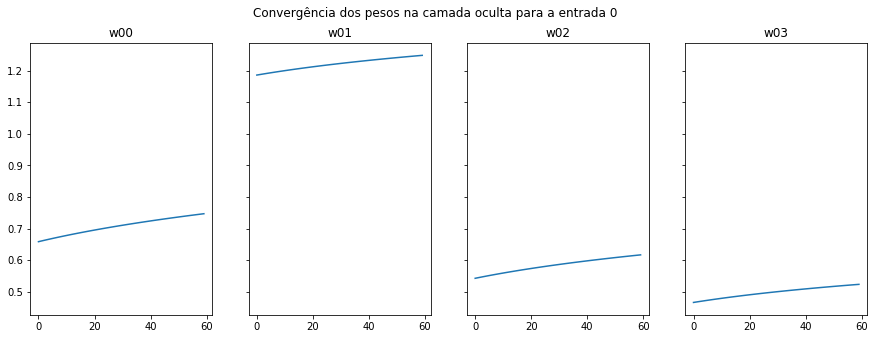

In [173]:
vis_w0_oc=np.array(ar_w0_cam_oc).reshape(max_iter,4)
fig, ax = plt.subplots(1, 4, figsize=(15,5), sharey=True)
fig.suptitle('Convergência dos pesos na camada oculta para a entrada 0')
ax[0].plot(range(max_iter),vis_w0_oc[:,0])
ax[0].set_title('w00')
ax[1].plot(range(max_iter),vis_w0_oc[:,1])
ax[1].set_title('w01')
ax[2].plot(range(max_iter),vis_w0_oc[:,2])
ax[2].set_title('w02')
ax[3].plot(range(max_iter),vis_w0_oc[:,3])
_=ax[3].set_title('w03')

## Convergência dos pesos na camada oculta para a entrada 1

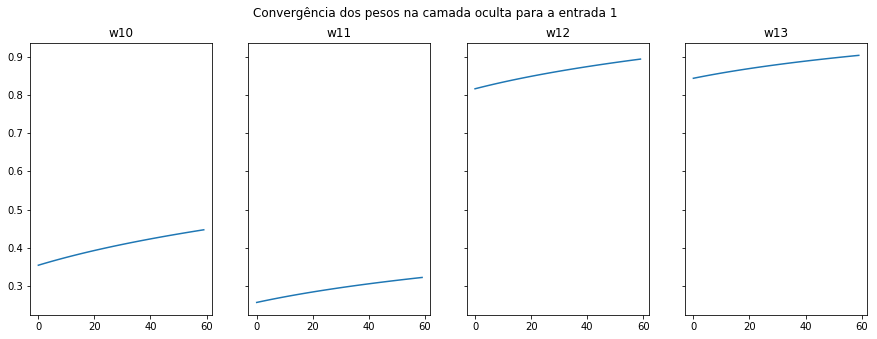

In [174]:
vis_w1_oc=np.array(ar_w1_cam_oc).reshape(max_iter,4)
fig, ax = plt.subplots(1, 4, figsize=(15,5), sharey=True)
fig.suptitle('Convergência dos pesos na camada oculta para a entrada 1')
ax[0].plot(range(max_iter),vis_w1_oc[:,0])
ax[0].set_title('w10')
ax[1].plot(range(max_iter),vis_w1_oc[:,1])
ax[1].set_title('w11')
ax[2].plot(range(max_iter),vis_w1_oc[:,2])
ax[2].set_title('w12')
ax[3].plot(range(max_iter),vis_w1_oc[:,3])
_=ax[3].set_title('w13')

## Convergência dos pesos na camada de saída para os 4 neurônios da camada oculta

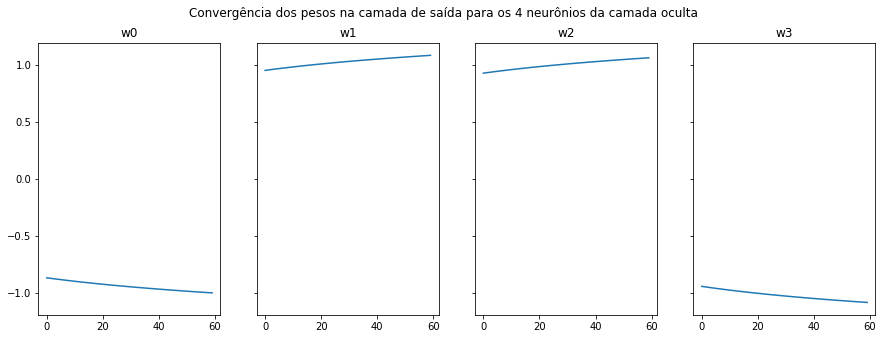

In [175]:
vis_w_s=np.array(ar_w_cam_saida).reshape(max_iter,4)
fig, ax = plt.subplots(1, 4, figsize=(15,5), sharey=True)
fig.suptitle('Convergência dos pesos na camada de saída para os 4 neurônios da camada oculta')
ax[0].plot(range(max_iter),vis_w_s[:,0])
ax[0].set_title('w0')
ax[1].plot(range(max_iter),vis_w_s[:,1])
ax[1].set_title('w1')
ax[2].plot(range(max_iter),vis_w_s[:,2])
ax[2].set_title('w2')
ax[3].plot(range(max_iter),vis_w_s[:,3])
_=ax[3].set_title('w3')

In [135]:
vis_res =np.array(resultados).reshape(max_iter,4)
pred_00 = vis_res[:,0]
pred_01 = vis_res[:,1]
pred_10 = vis_res[:,2]
pred_11 = vis_res[:,3]

## Convergência dos resultados para cada entrada possível

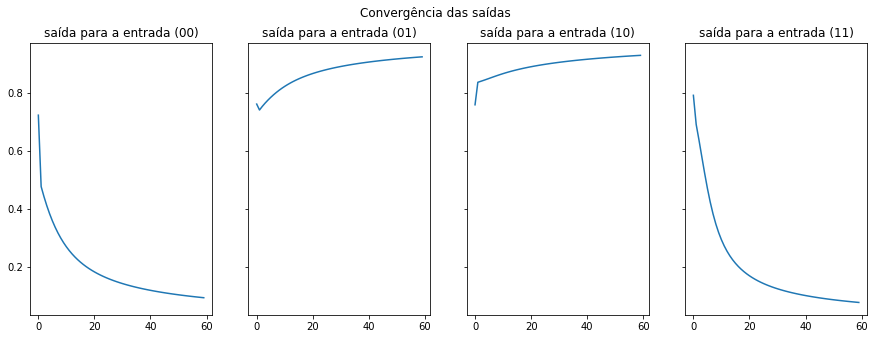

In [176]:
fig, ax = plt.subplots(1, 4, figsize=(15,5), sharey=True)
fig.suptitle('Convergência das saídas')
ax[0].plot(range(max_iter),pred_00)
ax[0].set_title('saída para a entrada (00)')
ax[1].plot(range(max_iter),pred_01)
ax[1].set_title('saída para a entrada (01)')
ax[2].plot(range(max_iter),pred_10)
ax[2].set_title('saída para a entrada (10)')
ax[3].plot(range(max_iter),pred_11)
_=ax[3].set_title('saída para a entrada (11)')

# Fim